# <a href="https://colab.research.google.com/github/AlinaKasiuk/Book-Recommendation-System/blob/main/Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math

In [2]:
print(os.listdir('./Datasets/'))

['BX-Book-Ratings.csv', 'BX-Books.csv', 'BX-Users.csv', 'Datasets']


In [3]:
rating = pd.read_csv('./Datasets/BX-Book-Ratings.csv', delimiter=';', encoding= 'unicode_escape')
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
rRow, rCol = rating.shape
print(f'The file BX-Book-Ratings.csv (dataset rating) has {rRow} rows and {rCol} columns')

The file BX-Book-Ratings.csv (dataset rating) has 1149780 rows and 3 columns


<AxesSubplot:>

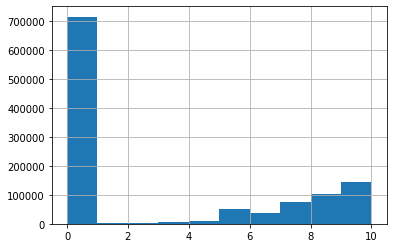

In [5]:
rating['Book-Rating'].hist()

In [6]:
rating =rating[rating['Book-Rating']!=0]

<AxesSubplot:>

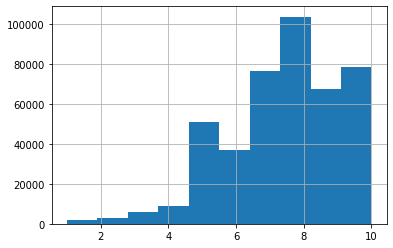

In [7]:
rating['Book-Rating'].hist()

In [8]:
rRow, rCol = rating.shape
print(f' {rRow} rows left in the dataset rating')

 433671 rows left in the dataset rating


In [9]:
book = pd.read_csv('./Datasets/BX-Books.csv', delimiter=';', encoding= 'unicode_escape', on_bad_lines='skip', low_memory=False)
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
book_rating = pd.merge(rating, book, on='ISBN')
cols = ['Year-Of-Publication', 'Publisher', 'Book-Author']
book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...


In [11]:
brRow, brCol = book_rating.shape
print(f'Now we have got the book_rating dataset with {brRow} rows yand {brCol} columns')

Now we have got the book_rating dataset with 383842 rows yand 10 columns


In [12]:
user = pd.read_csv('./Datasets/BX-Users.csv', delimiter=';', encoding= 'unicode_escape')
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
uRow, uCol = user.shape
print(f'The file BX-Users.csv (dataset rating) has {uRow} rows and {uCol} columns')

The file BX-Users.csv (dataset rating) has 278858 rows and 3 columns


<AxesSubplot:>

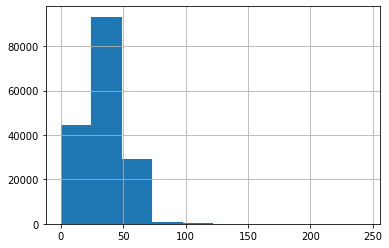

In [14]:
user['Age'].hist()

In [15]:
rating_count = (book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'RatingCount_book'})
     [['Book-Title', 'RatingCount_book']]
    )

threshold = 20
rating_count = rating_count.query('RatingCount_book >= @threshold')

In [16]:
user_rating = pd.merge(rating_count, book_rating, left_on='Book-Title', right_on='Book-Title', how='left')
user_rating.head()

,Book-Title,RatingCount_book,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,'Salem's Lot,22,33283,0451168089,10,Stephen King,1990,Signet Book,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...
1,'Salem's Lot,22,56044,0451168089,8,Stephen King,1990,Signet Book,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...
2,'Salem's Lot,22,60263,0451168089,10,Stephen King,1990,Signet Book,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...
3,'Salem's Lot,22,70065,0451168089,5,Stephen King,1990,Signet Book,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...
4,'Salem's Lot,22,71712,0451168089,5,Stephen King,1990,Signet Book,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...


In [17]:
user_count = (user_rating.
     groupby(by = ['User-ID'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'RatingCount_user'})
     [['User-ID', 'RatingCount_user']]
    )

threshold = 10
user_count = user_count.query('RatingCount_user >= @threshold')

In [18]:
combined = user_rating.merge(user_count, left_on = 'User-ID', right_on = 'User-ID', how = 'inner')
combined.head()

,Book-Title,RatingCount_book,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,RatingCount_user
0,'Salem's Lot,22,33283,0451168089,10,Stephen King,1990,Signet Book,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...,10
1,Dragon Tears,38,33283,0425140032,9,Dean R. Koontz,1995,Berkley Publishing Group,http://images.amazon.com/images/P/0425140032.0...,http://images.amazon.com/images/P/0425140032.0...,http://images.amazon.com/images/P/0425140032.0...,10
2,GARDEN OF SHADOWS (Dollanger Saga (Paperback)),27,33283,067164257X,10,Ariel Jennifer Jones,1987,Pocket,http://images.amazon.com/images/P/067164257X.0...,http://images.amazon.com/images/P/067164257X.0...,http://images.amazon.com/images/P/067164257X.0...,10
3,Not Without My Daughter,24,33283,0312925883,10,Betty Mahmoody,1993,St. Martin's Press,http://images.amazon.com/images/P/0312925883.0...,http://images.amazon.com/images/P/0312925883.0...,http://images.amazon.com/images/P/0312925883.0...,10
4,The Dead Zone,58,33283,0451155750,6,Stephen King,2004,Signet Book,http://images.amazon.com/images/P/0451155750.0...,http://images.amazon.com/images/P/0451155750.0...,http://images.amazon.com/images/P/0451155750.0...,10


In [19]:
combined = user_rating.merge(user_count, left_on = 'User-ID', right_on = 'User-ID', how = 'inner')
combined1=combined
combined.head()

,Book-Title,RatingCount_book,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,RatingCount_user
0,'Salem's Lot,22,33283,0451168089,10,Stephen King,1990,Signet Book,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...,http://images.amazon.com/images/P/0451168089.0...,10
1,Dragon Tears,38,33283,0425140032,9,Dean R. Koontz,1995,Berkley Publishing Group,http://images.amazon.com/images/P/0425140032.0...,http://images.amazon.com/images/P/0425140032.0...,http://images.amazon.com/images/P/0425140032.0...,10
2,GARDEN OF SHADOWS (Dollanger Saga (Paperback)),27,33283,067164257X,10,Ariel Jennifer Jones,1987,Pocket,http://images.amazon.com/images/P/067164257X.0...,http://images.amazon.com/images/P/067164257X.0...,http://images.amazon.com/images/P/067164257X.0...,10
3,Not Without My Daughter,24,33283,0312925883,10,Betty Mahmoody,1993,St. Martin's Press,http://images.amazon.com/images/P/0312925883.0...,http://images.amazon.com/images/P/0312925883.0...,http://images.amazon.com/images/P/0312925883.0...,10
4,The Dead Zone,58,33283,0451155750,6,Stephen King,2004,Signet Book,http://images.amazon.com/images/P/0451155750.0...,http://images.amazon.com/images/P/0451155750.0...,http://images.amazon.com/images/P/0451155750.0...,10


In [20]:
print('Unique books: ', combined['Book-Title'].nunique())
print('Unique users: ', combined['User-ID'].nunique())

Unique books:  2333
Unique users:  2200


In [21]:
scaler = MinMaxScaler()
combined['Book-Rating'] = combined['Book-Rating'].values.astype(float)
rating_scaled = pd.DataFrame(scaler.fit_transform(combined['Book-Rating'].values.reshape(-1,1)))
combined['Book-Rating'] = rating_scaled

In [22]:
combined = combined.drop_duplicates(['User-ID', 'Book-Title'])
user_book_matrix = combined.pivot(index='User-ID', columns='Book-Title', values='Book-Rating')
user_book_matrix.fillna(0, inplace=True)
users = user_book_matrix.index.tolist()
books = user_book_matrix.columns.tolist()
user_book_matrix = np.asmatrix(user_book_matrix)